# HotDog or NotHotDog

This is the code used during a hackathon with General Assembly. The data for the project comes from [Kaggle](https://www.kaggle.com/yashvrdnjain/hotdognothotdog).


![Jian-Yang](./assets/jian_yang_hbo_silicon_valley.0.jpeg)


In [2]:
# Suppressing deprecation warning
import warnings
warnings.filterwarnings('ignore')

# imports. Gotta bring some mates
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

# For reproducibility
np.random.seed(42)

### Let's go ahead and upload both image classes from our training data

In [4]:
# create list
hotdog = []
# define filepath for HotDog class
hotdog_path = './data/train/hotdog/'

# convert each image to normalized array and store
for file in os.listdir(hotdog_path):
    #print(file)
    #print(dog_path+file)
    try:
        # target_size automatically resizes each img on import
        hotdoggy = load_img(hotdog_path + file, target_size=(256, 256))
        hotdog_arr = img_to_array(hotdoggy) / 255
        hotdog.append(hotdog_arr)
    except:
        print(f'Error for file: {file}')

print(f'{len(hotdog)} pictures converted.')    

1500 pictures converted.


In [5]:
# create list
not_hotdog = []
# define filepath for HotDog class
not_hotdog_path = './data/train/nothotdog/'

# convert each image to normalized array and store
for file in os.listdir(not_hotdog_path):
    #print(file)
    #print(dog_path+file)
    try:
        # target_size automatically resizes each img on import
        notdoggy = load_img(not_hotdog_path + file, target_size=(256, 256))
        notdog_arr = img_to_array(notdoggy) / 255
        not_hotdog.append(notdog_arr)
    except:
        print(f'Error for file: {file}')

print(f'{len(not_hotdog)} pictures converted.')    

1500 pictures converted.


In [6]:
# X should contain both pictures of scrumptious hot dogs, and far less scrumptious not hot dogs
X = hotdog + not_hotdog
# convert to array and check shape
X = np.array(X)
print(f'X shape: {X.shape}')

# 0 for hotdog, 1 for not hotdog
y = [1] * 1500 + [0] * 1500 

# convert to array and check shape
y = np.array(y)
print(f'y shape: {y.shape}')

X shape: (3000, 256, 256, 3)
y shape: (3000,)


### Train-test splitting

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
X_train.shape

(2250, 256, 256, 3)

In [9]:
X_train[0].shape

(256, 256, 3)

In [10]:
y_train.shape

(2250,)

### Fit and train the model

In [32]:
input_shape = (256,256,3)
model = Sequential()

# conv, pool 
# 64 filters, (3,3) will need to tune these hyperparameters later
# two rounds of feature selection! 
model.add(Conv2D(64, (3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2,2)))

# conv, pool
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

# conv, pool
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

# flatten/dense, dense layer needs the flat format because it can't handle a matrix
model.add(Flatten())
model.add(Dense(64, activation='relu'))

# dense/output
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', 
             loss='binary_crossentropy', 
             metrics=['acc'])

results = model.fit(X_train, y_train,
         validation_data=(X_test, y_test),
         epochs=10,
         batch_size=64)

Epoch 1/10
36/36 [==============================] - 149s 4s/step - loss: 0.8312 - acc: 0.5201 - val_loss: 0.6130 - val_acc: 0.6493
Epoch 2/10
36/36 [==============================] - 145s 4s/step - loss: 0.6422 - acc: 0.6627 - val_loss: 0.5843 - val_acc: 0.6880
Epoch 3/10
36/36 [==============================] - 144s 4s/step - loss: 0.5769 - acc: 0.7016 - val_loss: 0.6036 - val_acc: 0.7000
Epoch 4/10
36/36 [==============================] - 150s 4s/step - loss: 0.5605 - acc: 0.7328 - val_loss: 0.5858 - val_acc: 0.6960
Epoch 5/10
36/36 [==============================] - 148s 4s/step - loss: 0.5250 - acc: 0.7402 - val_loss: 0.6507 - val_acc: 0.6920
Epoch 6/10
36/36 [==============================] - 164s 5s/step - loss: 0.4440 - acc: 0.7803 - val_loss: 0.5878 - val_acc: 0.7093
Epoch 7/10
36/36 [==============================] - 155s 4s/step - loss: 0.3400 - acc: 0.8661 - val_loss: 0.8412 - val_acc: 0.6640
Epoch 8/10
36/36 [==============================] - 166s 5s/step - loss: 0.3273 - a

In [33]:
model.save('./assets/model')

INFO:tensorflow:Assets written to: ./assets/model/assets


In [34]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 125, 125, 128)     73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 60, 60, 64)        73792     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 57600)            

In [35]:
model.predict(X_test[0:1])

array([[0.00173342]], dtype=float32)

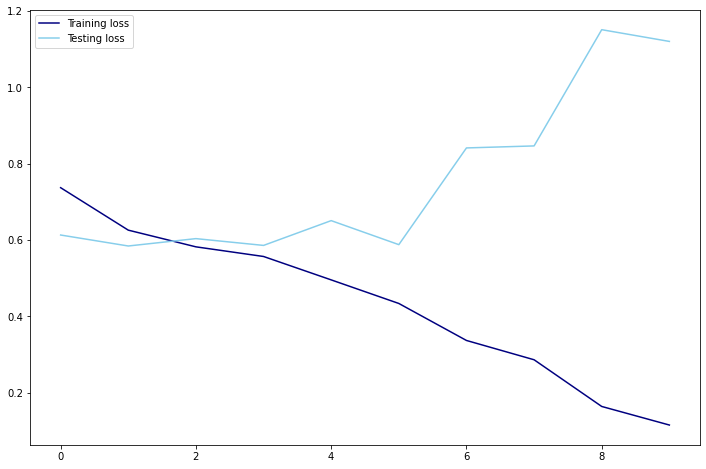

In [36]:
# Visualize the loss
train_loss = results.history['loss']
test_loss = results.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

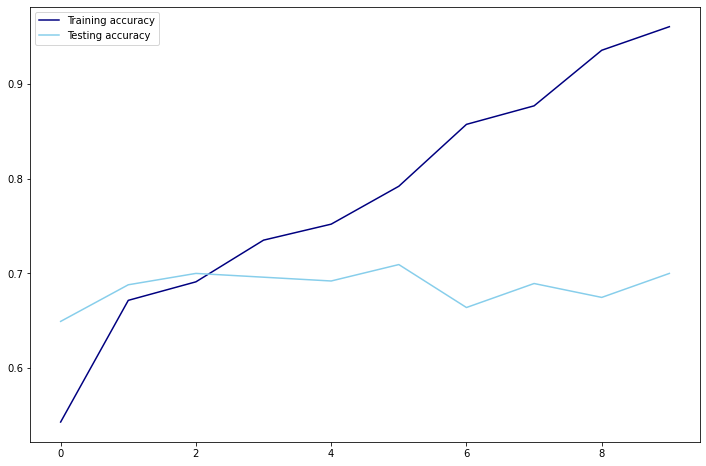

In [37]:
# Visualize the accuracy
train_acc = results.history['acc']
test_acc = results.history['val_acc']

plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='Training accuracy', color='navy')
plt.plot(test_acc, label='Testing accuracy', color='skyblue')
plt.legend();